# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
import matplotlib.pyplot as plt 
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

data = pd.read_csv("customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print ("Wholesale customers dataset has {} rows, {} columns".format( * data.shape))
print (data.head())


Wholesale customers dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [20, 101, 220]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples.index = indices
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
20,17546,4519,4602,1066,2259,2124
101,1420,10810,16267,1593,6766,1838
220,14755,899,1382,1765,56,749


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C95C828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA26A90>]], dtype=object)

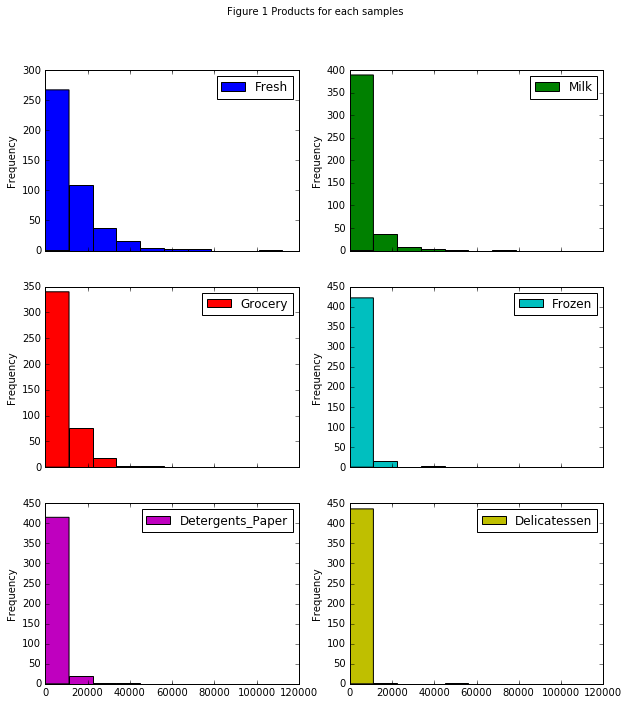

In [48]:
data.plot(kind='hist',subplots=True,layout=(3,2), legend=True, figsize=(10,11),title ='Figure 1 Products for each samples')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Based on the products distribution, we can distinguish the results are very skewed. The kind of establishment / customer could each share of the three data points chosen are Fresh, Milk and Grocery. We can see from the product distribution that Grocery and Detergents paper are slightly close. The grocery here can be chosen because of the higher range of income. 

Let's compare three data points we picked. Data point 20, 101 and 220. We can see from data point 20 ; compared two others, Fresh product has higher score. We can see the majority or stronger data points can be found in Fresh and Milk. The sample customer can be people who come to small family owned grocery shop near highway in suburb area. We can say this by assuming the high rate of Fresh products and Milk. Grocery and Detergents paper might be other clues in order to figure out that the sample could be in suburb area and more family oriented. Frozen and Delicatessen numbers aren't so high, this could imply that the small grocery store sell more local products rather than frozen and delicatessen (assuming foreign products).

**Reviewer asked to compare each individual sample to entire dataset. This will help in order to provide justification based on the descriptive stats of the data. Compare to the mean / median**

Data point 20 (Small Grocery Shop) compared to the mean: Fresh is higher, Milk Grocery Frozen and Detergent Paper are lower, and Delicatessen is higher than the mean. This tells us that data point 20 is strongly looking for Fresh and Delicatessen

Data point 101 (Hotel) compared to the mean: Fresh is lower, Milk and Grocery are higher, Frozen is lower, Detergents and Delicatessen are higher. In fact the three higher / stronger scores can be found in Milk, Grocery and Detergent paper.

Data point 220 (Small Grocery Shop) compared to the mean: Fresh is higher, Milk is way lower as well the Grocery and detergent papers, Frozen is lower as well as Delicatessen.

In conclusion, data point 20 will spend more in food products (fresh and delicatessen). Data point 101 will spend more in daily needs (basic needs for living and cleaning). Data point 220 will spend more in fresh products (perhaps fruits and veggies)



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [51]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

added_score = []
for s_col in data.columns:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.copy()
    new_y = new_data[s_col]
    new_x = new_data.drop([s_col], axis=1)
   
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_x, new_y, test_size=None, random_state=120)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Add random state per reviewer suggestion
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = r2_score(regressor.predict(X_test), y_test)
    added_score.append(score)

df_rsquare = pd.DataFrame(added_score, index = data.columns, columns=["Rsquare Score"])
df_rsquare.index.names = ["Products Prediction"]
df_rsquare

,Rsquare Score
Products Prediction,
Fresh,-0.312263
Milk,0.012627
Grocery,0.475601
Frozen,-0.270939
Detergents_Paper,0.548368
Delicatessen,-5.990063


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Initially we attempted to predict Fresh, Milk, Grocery and Detergent Paper. 

The fresh products went to negative R square and lower score to Milk. This means the model fails to fit the data. However, this doesn't mean Low R-squared values inherently bad. In this case, customer segments are harder to predict, since this is our goal to find the significant predictor to draw out conclusions how it's being associated with the changes in the measurements.

However, we can see those two items Grocery and Detergent Paper actually closer to 1. This means these two products are going to fit to the model. 

**We will say that the necessary feature for idetifying customer spending habits is Fresh. Based on the fact, the high r square score will not bring doof fit for identifying the customer spending because only one prediction we are comparing. This explains the reason why we would neglect the Grocery (previously added Grocery and Fresh). The reason is we want to get the representation for the customer with different features. **

In conclusion, I would prefer to look at the ratio F-score rather looking the story from R square. R square works when we want to measure the linearity of model / feature fits. We need to evaluate R square values in conjunction with residual and other models. R square here provides the estimation of the relationship strength between model and variable. Meanwhile, F score gives the statistical relantionship more significant.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

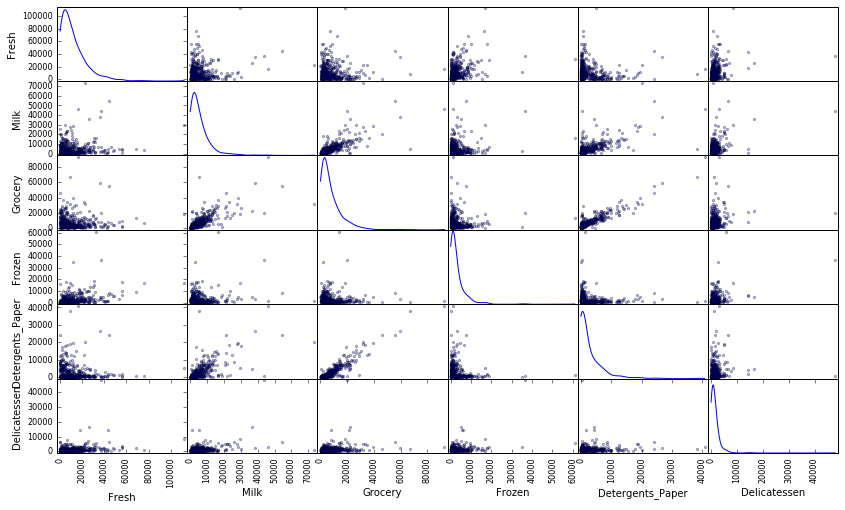

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [9]:
correlation = data.corr()
correlation

Products Prediction,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Products Prediction,,,,,,
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The visualization shows the data seems skewed to the left. Also, it shows that the data is showing Log Normal Distribution. Let's take a look at the correlation to figure the relationship. 

We can see from the correlation table the best relationship can be found between Grocery and Detergents Paper which the correlation score is 0.9246. It seems these two products are "conjuctionly good" to each other. 

Milk-Grocery and Milk-Detergent Paper might slighlty correlated with each other.

Another less slightly correlated we can find from Fresh-Frozen (0.34) and Delicateseen-Frozen (0.39)

I would think the data points will lie on two features (Grocery - Detergent Paper and Grocery - Milk)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

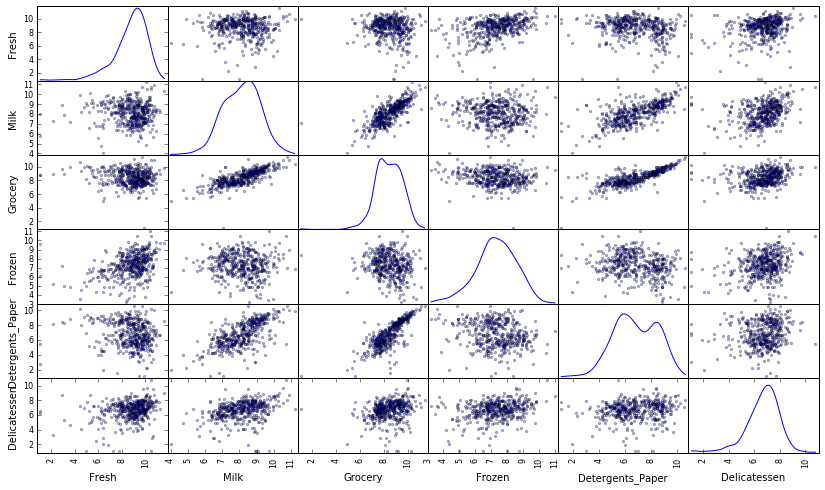

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data.copy())

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples.copy())

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
20,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056
101,7.258412,9.288227,9.696894,7.373374,8.819665,7.516433
220,9.599337,6.801283,7.231287,7.475906,4.025352,6.618739


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [53]:
# For each feature find the data points with extreme high or low values
unique_outliers_index = dict()
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    outliers_df= log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    reshape_outlier= outliers_df.shape[0]
    print ("{:18s} = {:18s}".format(feature, str(reshape_outlier)))
    for x in outliers_df.index:
        if x not in unique_outliers_index.keys():
            unique_outliers_index[x] = 1
        else:
            unique_outliers_index[x] +=1
    
# OPTIONAL: Select the indices for data points you wish to remove
# Corrected the outliers, previously outliers were for testing purpose
outliers  = [65,66,75,128,154]

print ("Total Outliers : {} and Unique Outliers : {}".format(sum(unique_outliers_index.values()),len(unique_outliers_index.keys())))
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("\n Outliers more than one feature: ")
df_more = log_data.loc[[x[0] for x in unique_outliers_index.items() if x[1]>1]]
df_more['count'] = None
df_more['count'] = [unique_outliers_index[x] for x in df_more.index]
df_more


Data points considered outliers for the feature 'Fresh':
Fresh              = 16                
Data points considered outliers for the feature 'Milk':
Milk               = 4                 
Data points considered outliers for the feature 'Grocery':
Grocery            = 2                 
Data points considered outliers for the feature 'Frozen':
Frozen             = 10                
Data points considered outliers for the feature 'Detergents_Paper':
Detergents_Paper   = 2                 
Data points considered outliers for the feature 'Delicatessen':
Delicatessen       = 14                
Total Outliers : 48 and Unique Outliers : 42

 Outliers more than one feature: 


Products Prediction,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,count
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612,2
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523,2
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837,2
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437,2
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442,3


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

There are 48 outliers found in the dataset. 42 data points are considered unique outliers with finding of 5 outliers more than one feature. To answer the data point needs to be removed from the data set, I would say 154 because it has been considered outliers for 3 groups. Others can still be included.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

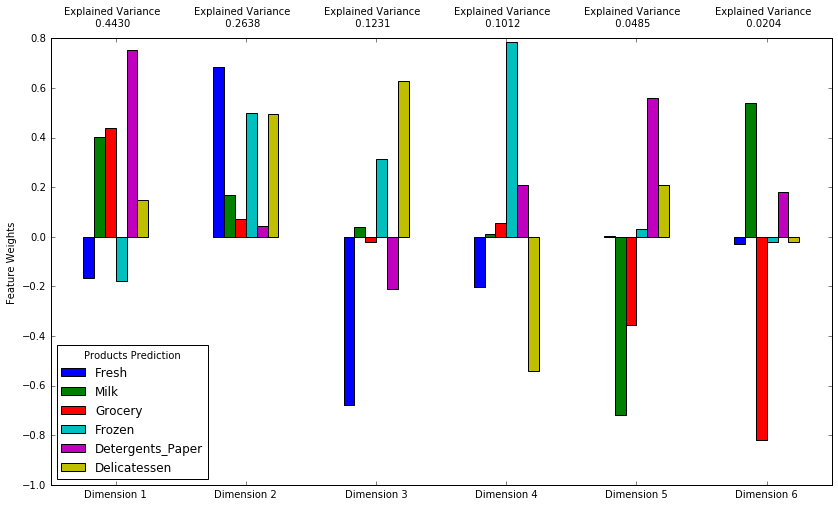

In [54]:
from sklearn import decomposition

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = decomposition.PCA(n_components=good_data.shape[1])
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [60]:
#import matplotlib.pyplot as plt
#x = np.arange(1,7)
#plt.plot(x, np.cumsum(pca.explained_variance_ratio_),'-o')
# Still TODO needs more information with np.cumsum

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

For the first and second Principal Component, we can conclude that the total result is 71.29% (Sum of 0.4307 and 0.2822). Meanwhile the first four principal components will bring us to the total result of 93.3% (Sum of the first four explained variance). This method will combine all principal component into a cartesian system which we can see the graph from original data point.

Now, finding first four best representation for customer spending, 
Lets see in 

** Review starts here**

**Dimension 1: the stronger PC is Detergent Paper. In this dimension, we can see that the strong variables are: Detergent Paper, Grocery and Milk. In dimension one, we would see the correlation between detergent paper, grocery and milk. The grocery and milk might bring effect to the increase of detergent paper. Therefore in this dimension, we can correlate these three variables. We can say this by looking at the explained variance relatively high **

**Dimension 2: Fresh. In this dimension, we can see that the strong variables are: Fresh, Delicatessen and Frozen. We can see the correlation with the Fresh, Delicatessen and Frozen. This also would apply like dimension 1 where Fresh variable might get affected by Delicatessen and Frozen variables. We can say this by looking at the explained variance relatively still high, compare to the Dimension 1  **

**Dimension 3:Fresh/Delicatessen. In this dimension, we can see that the strong variables are: Fresh, Delicatessen, Frozen and Detergent Paper. Surprisingly, we can see that there is a huge difference between Fresh and Delicatessen. The number of the Fresh get increased by the correlation with Detergents paper. On the other side, the frozen gets impacted by delicatessen. In this dimension,we can see the huge difference with the customer segment options between Fresh and Frozen. We can say this by looking at the variance which is consider lower than Dimension 2 **

**Dimension 4:Frozen with high feature weight. In this dimesnion, we can see that the strong variables are: Frozen, Delicatessen and Fresh / Detergent Papers. The fourth dimension, we can conclude that the Frozen products are affected by Fresh and Delicatessen. If the customer won't buy the Fresh and Delicatessen (decreasing) then it might imply that the customer will likely buy the Frozen products. We can say this by looking at the explained variance which relatively lower than Dimension 3 **

**Dimension 5:Milk. In this dimension, we can see that the strong variables are: Milk, Detergent Paper, Grocery and Delicatessen. **

**Dimension 6: Grocery.In this dimension, we can see that the strong variables are: Grocery, Milk and Detergent Paper **

Remember, we want to see the weighted linear combination compare to the original values. In this case increase of the positive weighted feature will introduce us to the new set of feature representation. In dimension 1 Detergent Paper is the winner with the strong positive value on the principal component, the second will be Grocery and Milk. Another good feature that is increasing is Delicatessen but not that greatly increased. 

Fresh and Frozen in the Dimension 2,3 and 4 slightly decreasing in principal component. The rate of increase or decrease can be considered vary based on the features. If the customer will likely shop Detergent Paper then it will only get increased in Dimension 1 and decreased in Dimension 2. In the opposite happens for Fresh products, get lower in Dimension 1 and increase in Dimension 2. What it tells, if the same customer buy the detergent paper first, he would likely buy the fresh product for the next item. 

It gets interesting in Dimension 2 and 3. After the Fresh product in the dimension 2, we can see the dimension 3 has closer weight between Fresh or Delicatessen. This morelikely falls to Fresh product. Delicatessen had the opposite effect than the Fresh product.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [55]:
# Display sample log-data after having a PCA transformation applied
df_frame=pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)
df_frame.index = log_samples.index
display(df_frame)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
20,0.8375,1.0765,-0.3684,-0.8111,0.5111,0.3040
101,2.8929,-0.2367,1.1485,0.4079,0.0238,0.0071
220,-3.3331,0.1830,-0.0061,-0.6771,-0.1655,-0.2403


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [56]:
# TODO: Fit PCA to the good data using only two dimensions
pca = decomposition.PCA(n_components=2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [57]:
# Display sample log-data after applying PCA transformation in two dimensions
df_frame=pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])
df_frame.index = log_samples.index
display(df_frame)

,Dimension 1,Dimension 2
20,0.8375,1.0765
101,2.8929,-0.2367
220,-3.3331,0.1830


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

**K-Means clustering algorithm Advantages:**

1) Easy, Fast and Robust (Hard Cluster)

2) Straightforward algorithm for simple data in shape.

3) Less expensive because doesn't need to calculate probability

**Gaussian Mixture Model Advantages:**

1) Robust in terms creating distributional assumption -fuzzy / soft clustering (reviewer mentioned to justify this which it was incorrect, GMM is slower than K-means)

2) Works good in hyperspace (taken more Bayesian Approach)

3) Using estimation maximization for fitting the Gaussian distribution within different clusters

For this problem in wholesale customer data, I would prefer to Gaussian Mixture Model as my choice. The variable is pretty much random and unobserved. This also represents the difficulties to find the best parameter. We will use PCA and look for the Estimation then Maximize the function hypotesis.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [38]:
from sklearn.mixture import GMM
from sklearn import metrics

#clusterer = GMM(n_components=2,covariance_type='tied',random_state=100).fit(reduced_data)
#preds = clusterer.predict(reduced_data)
#centers = clusterer.means_
#sample_preds = clusterer.predict(pca_samples)
#score = metrics.silhouette_score(reduced_data, preds)

#Several cluster numbers
range_components = [2,3,4,5,6,7,8,9,10]

#Create variable to store the results
data_score ={}
#covar = ['spherical','full','tied','diag']

#Do for loop for all the components / cluster numbers
#for covariance_type in covar:

for n_components in range_components:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components,covariance_type='tied',random_state=100).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data, preds)
    #print ("Covariance Type :", covar)
#    print("\nNumber of components GMM : ",n_components)
#    print ("Silhoutte score :" , score)

Number of components GMM :  2
Silhoutte score : 0.413849562396

Number of components GMM :  3
Silhoutte score : 0.376282744072

Number of components GMM :  4
Silhoutte score : 0.296114284837

Number of components GMM :  5
Silhoutte score : 0.256055690647

Number of components GMM :  6
Silhoutte score : 0.317027698073

Number of components GMM :  7
Silhoutte score : 0.319930400064

Number of components GMM :  8
Silhoutte score : 0.302112354485

Number of components GMM :  9
Silhoutte score : 0.316878830988

Number of components GMM :  10
Silhoutte score : 0.288895674331

In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics

n_components_kmeans = 2

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer_kmeans = KMeans(n_components_kmeans,random_state=100).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds_kmeans = clusterer_kmeans.predict(reduced_data)
# TODO: Find the cluster centers
centers_kmeans = clusterer_kmeans.cluster_centers_
# TODO: Predict the cluster for each transformed sample data point
sample_preds_kmeans = clusterer_kmeans.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score_kmeans = metrics.silhouette_score(reduced_data, preds)
print("\nNumber of components KMeans : ",n_components_kmeans)
print ("Silhoutte score :" , score_kmeans)


Number of components KMeans :  2
Silhoutte score : 0.288895674331


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

We can see from the results. Compare GMM and KMeans. The best number of cluster compared with the silhouette coefficient score is two clusters. The clustering algorithm I chose GMM with tied covariance type. This will give me the highest silhouette score so far (above 40% chance) compared to the KMeans with the same number of cluster (2).

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

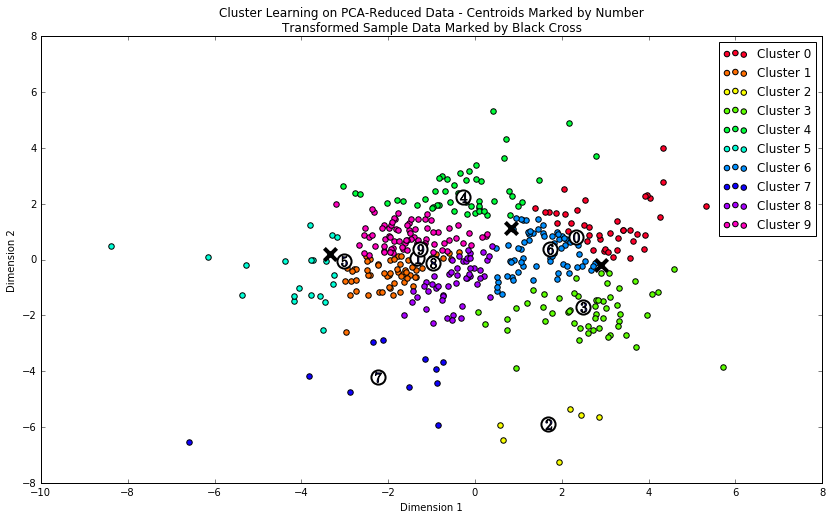

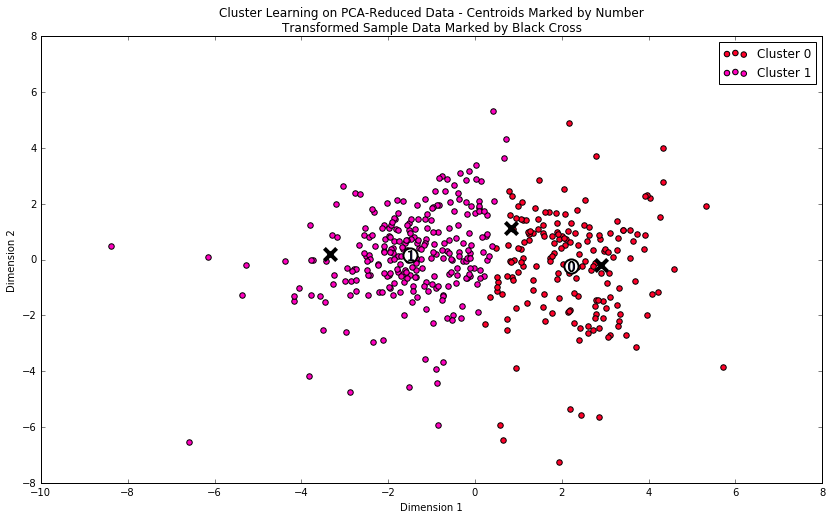

In [41]:
# Display the results of the clustering from implementation
cluster_final_GMM = rs.cluster_results(reduced_data, preds, centers, pca_samples)
cluster_final_kmeans = rs.cluster_results (reduced_data,preds_kmeans,centers_kmeans,pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [43]:
# TODO: Inverse transform the centers
# Use GMM Centers result
# configure GMM to 2 clusters

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GMM(n_components=2,covariance_type='tied',random_state=100).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds)

log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Products Prediction,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3148.0,7065.0,11586.0,820.0,4125.0,852.0
Segment 1,9451.0,2198.0,2707.0,2128.0,357.0,757.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

From the Segment 0 and Segment 1, we can see that the average customer in segment 0 consumes more in the Grocery, Milk and Detergents paper. This could identify the establishment as small coffee shop. Meanwhile in segment 1, we can see the average customer consumes more in Fresh products. More than 50% of the data set on the Fresh categories. This means the customer who is assigned to this categories would shop in local family owned grocery shop.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [45]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)
    
#Sample point 0 -> 20
#Sample point 0 -> 101
#Sample point 0 -> 220

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

The sample point 20 would likely go to Small coffee shop / convenience store  where he can quickly grab Grocery, Milk and Detergents paper. It would make the sample point match to Cluster 1. This also applies to the Sample point 2 (220) would be likely fall into Cluster 1. Now, it gets interesting when we see the sample point 101. This customer would likely go to local family owned grocery shop where he can buy Fresh products. This would likely fall into Cluster 0 despite the results for Grocery, Milk, Detergent paper and Delicatessen are below the average. This Cluster is high in Fresh but low in Detergent Papers. In Cluster 0, we can see the results are pretty much different than Cluster 1. Cluster 1 would likely tend to diverse (more than 1 features, Grocery, Milk and Detergent paper) however Cluster 0 would likely tend to dominate by the Fresh feature. 

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**

We want to see the predict the customer segment which it can say the type. The goal is determine what customer would likely to buy by looking at the establishment consideration. Running A/B test would make only small changes to the comparison. I think the A/B Test would be beneficial when the company tries to look/predict better the customer behavior.

Based on the analysis given, we can conclude that there is two groups (cluster 0 and cluster 1). It would depend the customer but perhaps might not be equally. 

**Reviewer addressed the confusion of the reasoning**

We can run the A/B test to the each segment (answering should they be from the same cluster or different). Why we would do this, because we can control the test within the market segment without concerning the other segment (remember, you emphasized the one variable in delivery methods- not multiple variable). 

First, change 5 days to 3 days a week. This is good when we can take some samples from each group ( cluster 0 and 1) and run A/B test. The number of the samples might be vary. It can be 10, 12, 20, 100. However, we need to group the samples by the segments. 

Second, we would see the respond of change in delivery times. Let's say we will have larger volume of customer with different features. If we don't segment the customers properly, one of the segment will overlap with the other segment. We also want to consider look a the p-value for the each test result. We are looking for the p-value greater than 95%. This means we can implement the change (5 days to 3 days). Well, this what the perfect world is in the delivery strategies.

From the given data we can see that customer would likely go to the Cluster 1 which spend more in Fresh product / feature. However this is still random because we might need to specify other samples and compare them. It might give different output in relationship with delivery startegies. 

In sum, we would like to iterate the segmentation to help to model the business startegy, logistics and marketing. The segmentation works well to determine which customer falls into different segment. This would reduce the cost in those three given areas (strategy, business, marketing).

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the clustering data you've found to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**

We can do classification supervised learning (Decision Tree). For instance, we already have the customer segment and we can extend the research by looking at the happy/ unhappy customer. This can be performed after we get the result from A/B Testing. Align as well with the goal of the company. Are they considering high volume customer with higher income or growth or focus on the niche market ? How about the company strategy to start distribution agent providing support to smaller grocery shop or coffee shop. 

The company can structure the data by using the cluster as new feature. But, remember it also can affect the prediction in customer segment group. We also have to face the randomness (curse of dimenstionality) and as well hurt the PCA samples. Segmentation will work perfectly to figure the sales in certain products. We could leverage this cluster to train supervised learning model (as mentioned above Decision Tree) and improve the performance of algorithm.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

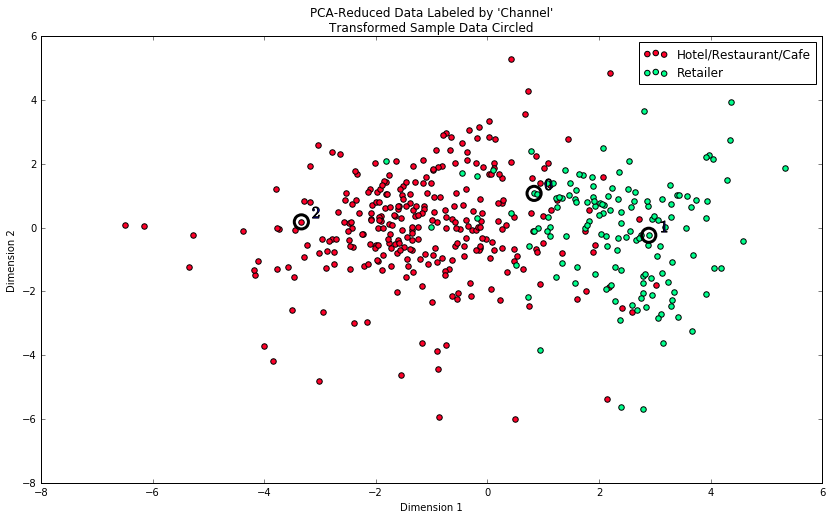

In [61]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

So we have two comparator " use the GMM or KMeans ". In this case we can the result that GMM works well with finding out the number of categories in the given dataset. We still can see some outliers but the majority of the segments are clear. TI believe the clustering algorithm and number of clusters work fine (2 to 3 clusters). The cluster 1 and 2 mostly separate the hotels and retailers. Customer who falls in cluster 2 will be purely in Hotel segment. Customer who falls in cluster 1 will be purely in Retailer segment. However, we might think in grey are when we talk about Cluster 0. We can see an intersection between the customer who wants to fall in Hotel and Retailer. They are basically share similar needs or we can say as behavior. To attract this customer, we might want to diversify the product segment. However, we need to think there is a relationship between the hotel/restaurant/cafe and retailer. The hotel/restaurant/cafe needs the retailer in order to keep the supply. The retailer can be more specific what they are selling to hotel, restaurant and cafe. This will fulfill the hotel/restaurant/ cafe needs to keep their customer. In sum, I believe this classification are consistent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.